# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from scipy import stats
import copy
import sys
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)

In [2]:
label_encoder = LabelEncoder()
vehicles = pd.read_csv('C:\\Users\\xxxxx\\Downloads\\vehicles.csv')

In [70]:
vehicles.describe()

,id,price,year,odometer,Car_age
count,4.268800e+05,4.268800e+05,426880.000000,4.268800e+05,426880.000000
mean,7.311487e+09,7.519903e+04,2011.251464,9.806350e+04,11.748536
std,4.473170e+06,1.218228e+07,9.443723,2.127765e+05,9.443723
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,1.000000
25%,7.308143e+09,5.900000e+03,2008.000000,3.813000e+04,6.000000
50%,7.312621e+09,1.395000e+04,2014.000000,8.660000e+04,9.000000
75%,7.315254e+09,2.648575e+04,2017.000000,1.330000e+05,15.000000
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,123.000000


In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [4]:
#check for any missing values
missing_values =  vehicles.isnull().sum()
# % Columns with null values 
missing_values_percentage = (missing_values/len(vehicles)) * 100
missing_values_percentage

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

In [6]:
#using mode(most common value used) for other columns missig values
vehicles['year'].fillna(vehicles['year'].mode()[0],inplace = True)
vehicles['manufacturer'].fillna(vehicles['manufacturer'].mode()[0],inplace = True)
vehicles['model'].fillna(vehicles['model'].mode()[0],inplace = True)
vehicles['condition'].fillna(vehicles['condition'].mode()[0],inplace = True)
vehicles['fuel'].fillna(vehicles['fuel'].mode()[0],inplace = True)
vehicles['odometer'].fillna(vehicles['odometer'].mode()[0],inplace = True)
vehicles['title_status'].fillna(vehicles['title_status'].mode()[0],inplace = True)
vehicles['transmission'].fillna(vehicles['transmission'].mode()[0],inplace = True)
vehicles['type'].fillna(vehicles['type'].mode()[0],inplace = True)
vehicles['size'].fillna(vehicles['size'].mode()[0],inplace = True)
vehicles['drive'].fillna(vehicles['drive'].mode()[0],inplace = True)
vehicles['cylinders'].fillna(vehicles['cylinders'].mode()[0],inplace = True)

#check for any missing values
missing_values_1 =  vehicles.isnull().sum()
print(missing_values_1)

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
VIN             161042
drive                0
size                 0
type                 0
paint_color     130203
state                0
dtype: int64


In [21]:

# Feature Extraction

#concatinating the columns (region and state) , (Model and Manufacturer) to simplify
vehicles['region_state'] = vehicles['region'].astype(str) + "_" + vehicles['state'].astype(str)


# Creating a new feature called total no. of years old my car.
vehicles['Car_age'] = 2023-vehicles['year']


# dropping column size as it has more than 30% of values as missing
#(except 'condition' asuming that is an important factor for predicting the prices) and VIN assuming this will not have any impact on the price

vehicles_1 = vehicles.drop(['id','VIN','paint_color','region','state','year'], axis = 1)

vehicles_1.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,region_state,Car_age
0,6000,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,prescott_az,6.0
1,11900,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,fayetteville_ar,6.0
2,21000,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,florida keys_fl,6.0
3,1500,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,worcester / central MA_ma,6.0
4,4900,ford,f-150,good,6 cylinders,gas,100000.0,clean,automatic,4wd,full-size,sedan,greensboro_nc,6.0


# Data Exploration and Visualization

In [22]:
print(vehicles_1['condition'].unique())
print(vehicles_1['fuel'].unique())
print(vehicles_1['title_status'].unique())
print(vehicles_1['transmission'].unique())
print(vehicles_1['type'].unique())
print(vehicles_1['manufacturer'].unique())
print(vehicles_1['size'].unique())
print(vehicles_1['drive'].unique())
print(vehicles_1['cylinders'].unique())
print(vehicles_1['model'].unique())



#'region_state' have way too many unique values ,and hence dropping the columns
vehicles_1 = vehicles_1.drop(['region_state'],axis = 1)

['good' 'excellent' 'fair' 'like new' 'new' 'salvage']
['gas' 'other' 'diesel' 'hybrid' 'electric']
['clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
['automatic' 'other' 'manual']
['sedan' 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
['ford' 'gmc' 'chevrolet' 'toyota' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
['full-size' 'mid-size' 'compact' 'sub-compact']
['4wd' 'rwd' 'fwd']
['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
['f-150' 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook 

In [23]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_numeric = ['odometer','price','Car_age']

for col in col_numeric: 
    q1 = vehicles_1[col].quantile(0.25)
    q3 = vehicles_1[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    vehicles_1 = vehicles_1.loc[(vehicles_1[col] > range_low) & (vehicles_1[col] < range_high)]

vehicles_1.shape

(399476, 13)

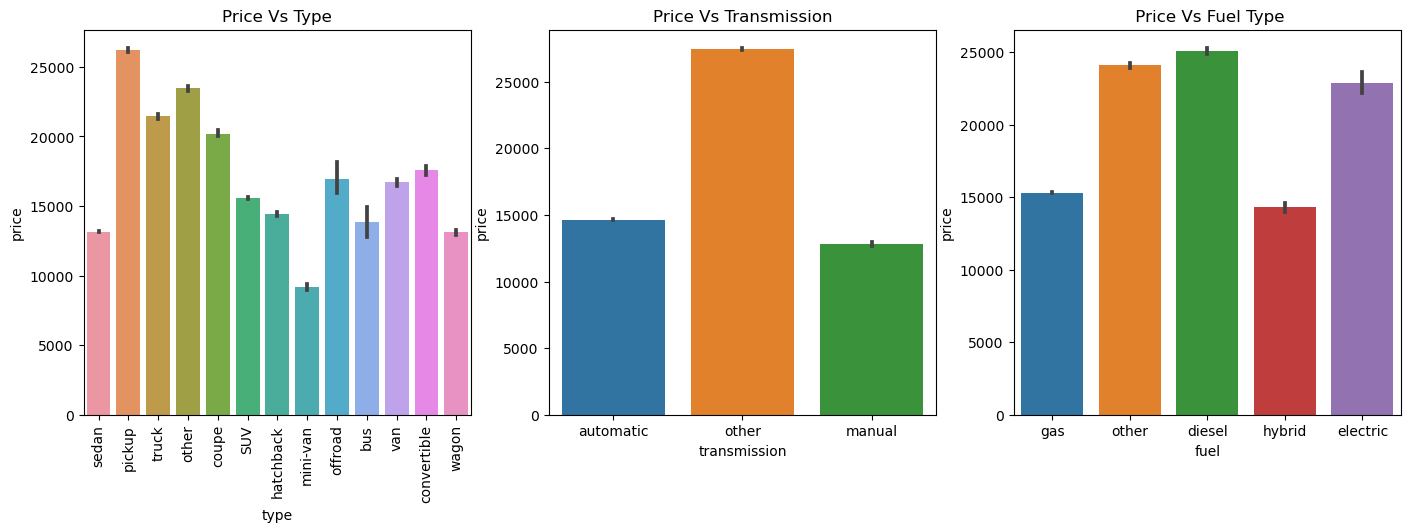

In [136]:
#Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x = vehicles_1['type'],y =vehicles_1['price'])
plt.xticks(rotation=90)
plt.title('Price Vs Type')

plt.subplot(1,3,2)
sns.barplot(x = vehicles_1['transmission'],y = vehicles_1['price'])
plt.title('Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x = vehicles_1['fuel'], y = vehicles_1['price'])
plt.title(' Price Vs Fuel Type')

plt.show()

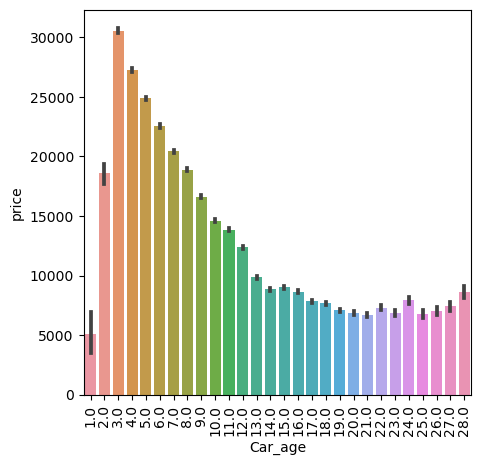

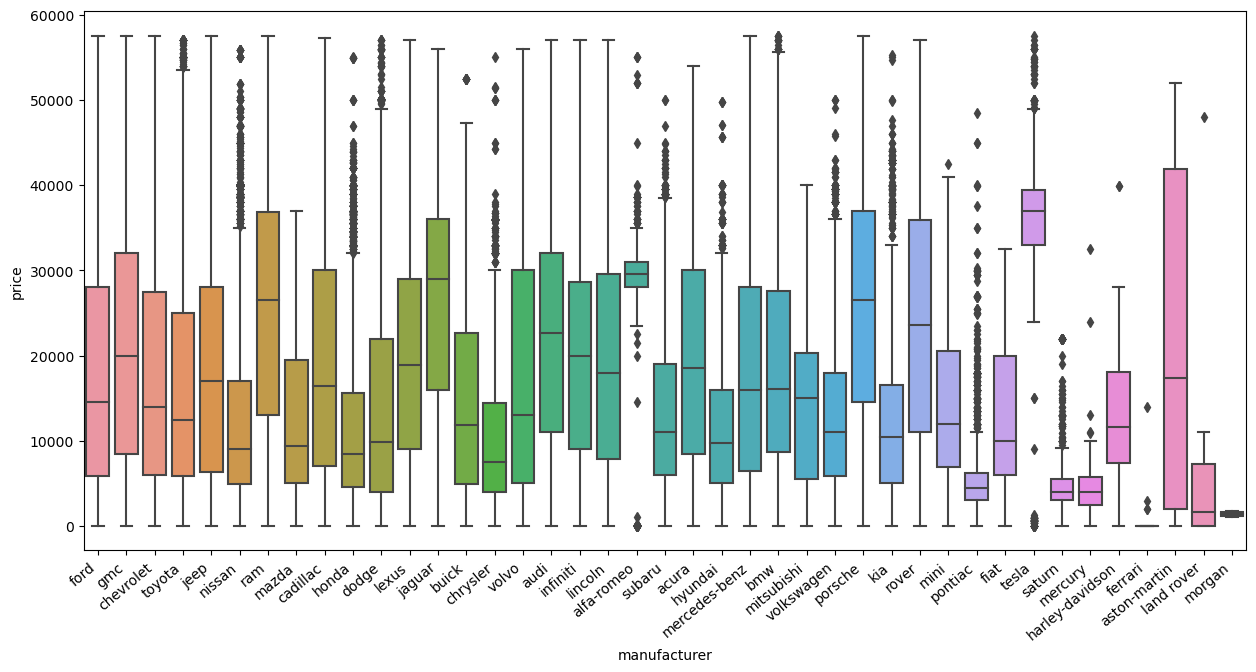

In [138]:
plt.figure(figsize=[17,5])

plt.subplot(1,3,1)
sns.barplot(x = vehicles_1['Car_age'],y = vehicles_1['price'])
plt.xticks(rotation=90)

plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='manufacturer',y='price',data=vehicles_1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


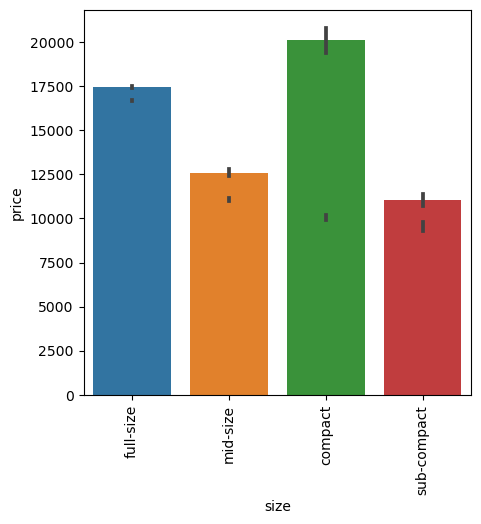

In [13]:
plt.figure(figsize=[17,5])

plt.subplot(1,3,1)
sns.barplot(x = vehicles_1['title_status'],y = vehicles_1['price'])
plt.xticks(rotation=90)

plt.subplot(1,3,1)
sns.barplot(x = vehicles_1['size'],y = vehicles_1['price'])
plt.xticks(rotation=90)

plt.show()


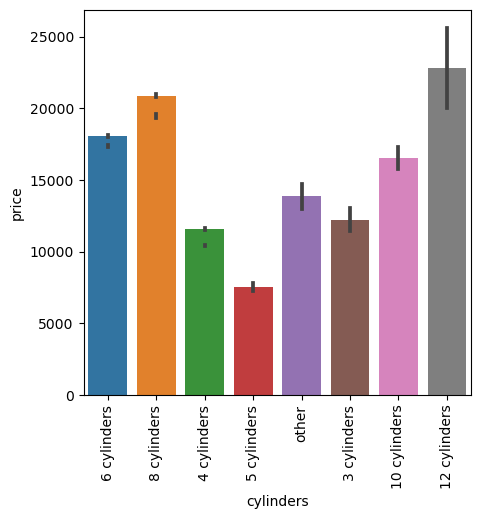

In [14]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x = vehicles_1['drive'],y = vehicles_1['price'])
plt.xticks(rotation=90)

plt.subplot(1,3,1)
sns.barplot(x = vehicles_1['cylinders'],y = vehicles_1['price'])
plt.xticks(rotation=90)
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [26]:
# transform categorical columns
categorical_columns = vehicles_1.select_dtypes(include=['object']).columns
for column in categorical_columns:
    vehicles_1[column] = label_encoder.fit_transform(vehicles_1[column].astype(str))

In [27]:
vehicles_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399476 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         399476 non-null  int64  
 1   manufacturer  399476 non-null  int32  
 2   model         399476 non-null  int32  
 3   condition     399476 non-null  int32  
 4   cylinders     399476 non-null  int32  
 5   fuel          399476 non-null  int32  
 6   odometer      399476 non-null  float64
 7   title_status  399476 non-null  int32  
 8   transmission  399476 non-null  int32  
 9   drive         399476 non-null  int32  
 10  size          399476 non-null  int32  
 11  type          399476 non-null  int32  
 12  Car_age       399476 non-null  float64
dtypes: float64(2), int32(10), int64(1)
memory usage: 27.4 MB


In [28]:
vehicles_1.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,Car_age
0,6000,12,11372,2,5,2,100000.0,0,0,0,1,9,6.0
1,11900,12,11372,2,5,2,100000.0,0,0,0,1,9,6.0
2,21000,12,11372,2,5,2,100000.0,0,0,0,1,9,6.0
3,1500,12,11372,2,5,2,100000.0,0,0,0,1,9,6.0
4,4900,12,11372,2,5,2,100000.0,0,0,0,1,9,6.0


<Axes: >

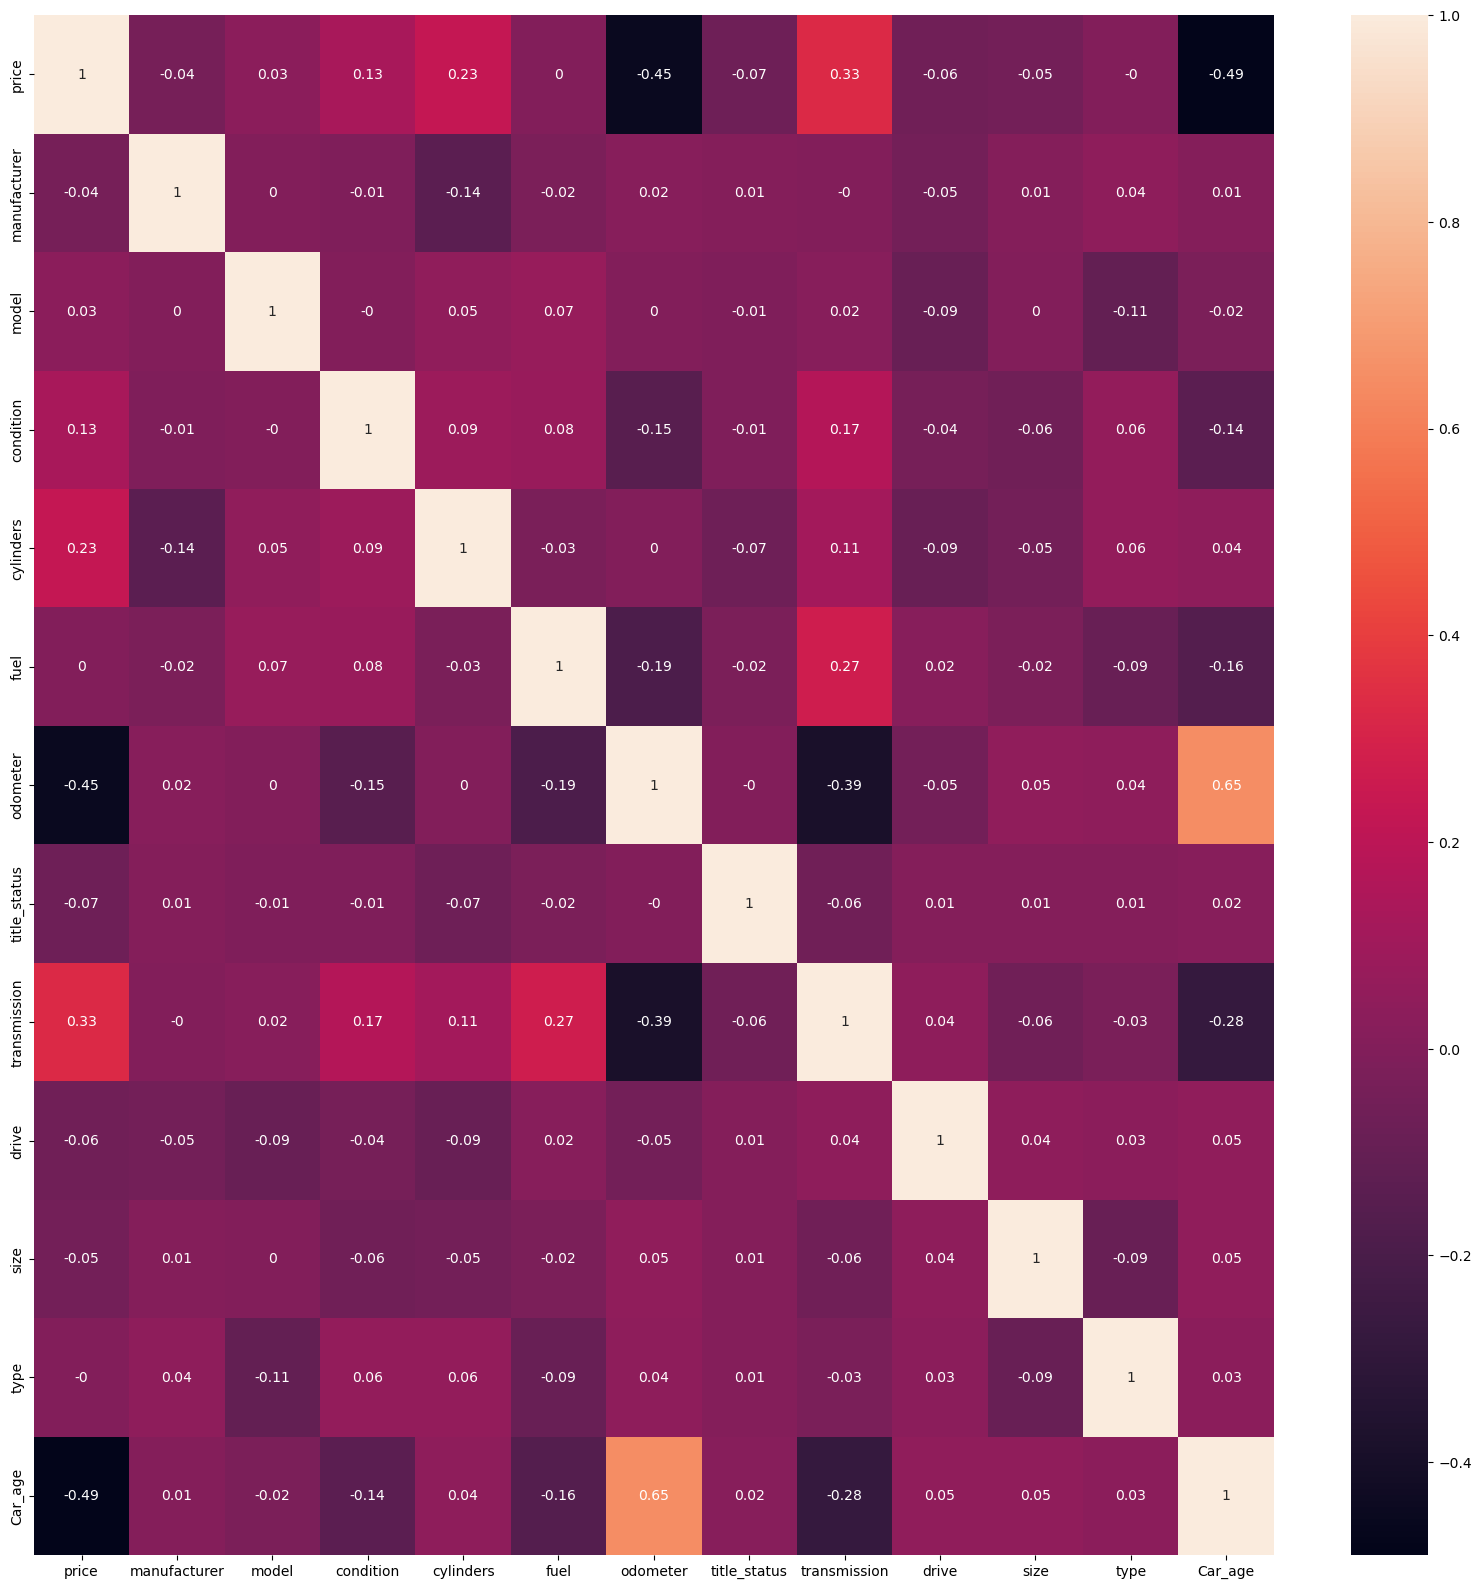

In [29]:
corr_graph =vehicles_1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_graph.round(2),annot=True)

In [50]:
#Extracting Training Data
X=vehicles_1[['manufacturer','Car_age','odometer','type','fuel','transmission','condition','title_status','model','cylinders','drive','size']]
y=vehicles_1['price']

In [51]:
# create training and test data for specific model (carmodel_data)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
# Initialize all prediction models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
ridge_model = Ridge(alpha=0.1)
lasso_model = Lasso(alpha=0.001)

In [53]:
# fit prediction models

linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [54]:
# Make predictions on the test set using all prediction models

y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

In [55]:
# calculate and print mse and rse for each prediction model

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error Linear: {mse}")
print(f"R^2 Score Linear: {r2}")

mseridge = mean_squared_error(y_test, y_pred_ridge)
r2ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error Ridge: {mseridge}")
print(f"R^2 Score Ridge: {r2ridge}")

mselasso = mean_squared_error(y_test, y_pred_lasso)
r2lasso = r2_score(y_test, y_pred_lasso)

print(f"Mean Squared Error Lasso: {mselasso}")
print(f"R^2 Score Lasso: {r2lasso}")

mserf = mean_squared_error(y_test, y_pred_rf)
r2rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error Random Forest: {mserf}")
print(f"R^2 Score Random Forest: {r2rf}")

msegb = mean_squared_error(y_test, y_pred_gb)
r2gb = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error Gradient Boosting: {msegb}")
print(f"R^2 Score Gradient Boosting: {r2gb}")

Mean Squared Error Linear: 110036439.52064295
R^2 Score Linear: 0.3682861288473055
Mean Squared Error Ridge: 110036439.69889629
R^2 Score Ridge: 0.36828612782396175
Mean Squared Error Lasso: 110036439.56515421
R^2 Score Lasso: 0.36828612859176857
Mean Squared Error Random Forest: 30878061.883453824
R^2 Score Random Forest: 0.8227305418908096
Mean Squared Error Gradient Boosting: 82770772.58353782
R^2 Score Gradient Boosting: 0.5248170024872824


In [43]:
# calculate optimal aplha for Ridge

# Define a range of alpha values
alpha_values = [0.01, 0.1, 1, 10, 100]

# RidgeCV automatically performs Leave-One-Out Cross-Validation if the dataset is small, or K-Fold CV otherwise
ridge_cv = RidgeCV(alphas=alpha_values, store_cv_values=True)

# Fit model
ridge_cv.fit(X_train, y_train)

# Optimal alpha value
print("Optimal Ridge alpha value:", ridge_cv.alpha_)

Optimal Ridge alpha value: 10.0


In [44]:
# calculate optimal aplha for Lasso

# Define a range of alpha values
alpha_values = [0.001, 0.01, 0.1, 1, 10]

# LassoCV for automatic alpha selection via cross-validation
lasso_cv = LassoCV(alphas=alpha_values, max_iter=10000, cv=5)

# Fit model
lasso_cv.fit(X_train, y_train)

# Optimal alpha value
print("Optimal Lass oalpha value:", lasso_cv.alpha_)

Optimal Lass oalpha value: 0.001


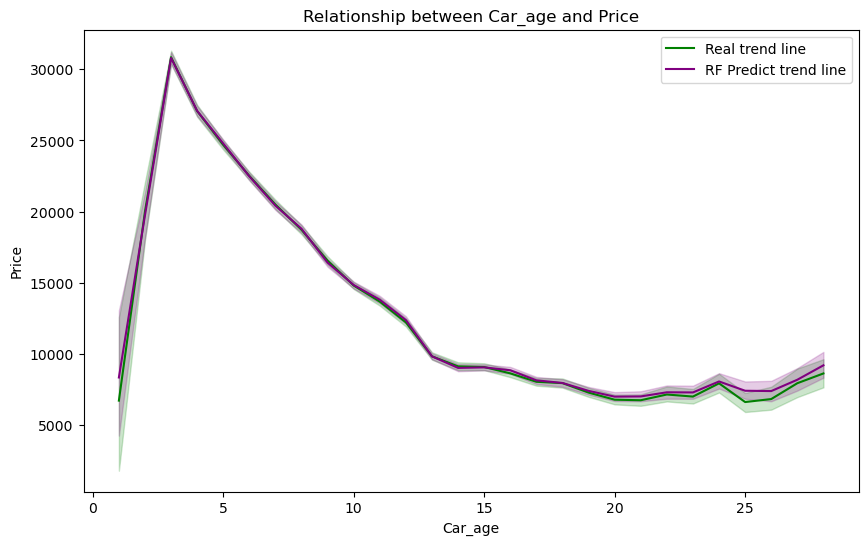

In [58]:
# Visualize the relationship between Randon Forest Model and Real Price with Test data and a Year vs Price Plot
plot_test_pred = X_test.copy()
plot_test_real = X_test.copy()
plot_test_pred['price_pred'] = y_pred_rf
plot_test_real['price_real'] = y_test

plt.figure(figsize=(10, 6))
sns.lineplot(x='Car_age', y='price_real', data=plot_test_real, color='green', label='Real trend line')
sns.lineplot(x='Car_age', y='price_pred', data=plot_test_pred, color='purple', label='RF Predict trend line')
plt.title('Relationship between Car_age and Price')
plt.xlabel('Car_age')
plt.ylabel('Price')
plt.legend()
plt.show()

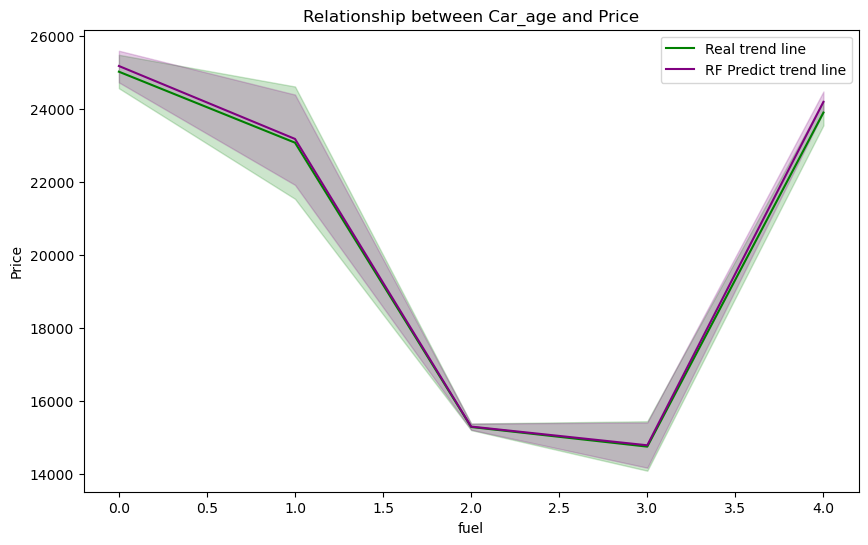

In [63]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='fuel', y='price_real', data=plot_test_real, color='green', label='Real trend line')
sns.lineplot(x='fuel', y='price_pred', data=plot_test_pred, color='purple', label='RF Predict trend line')
plt.title('Relationship between Car_age and Price')
plt.xlabel('fuel')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# transform categorical columns
categorical_columns = vehicles_1.select_dtypes(include=['object']).columns
for column in categorical_columns:
    vehicles_1[column] = label_encoder.fit_transform(vehicles_1[column].astype(str))

X1=vehicles_1[['manufacturer','Car_age','odometer','type','fuel','transmission','condition','title_status','model','cylinders','drive','size']]
y1=vehicles_1['price']

X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2)

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train1, y_train1)

rfe = RFE(lm, step = 11)                # running RFE

X_train_rfe = rfe.fit_transform(X_train1,y_train1)
X_test_rfe = rfe.transform(X_test1)
lm.fit(X_train_rfe,y_train1)

#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

col = X_train1.columns[rfe.support_]

col

Index(['Car_age', 'fuel', 'transmission', 'title_status', 'cylinders',
       'drive'],
      dtype='object')

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

##### Executive summary
This report helps understand the used car dealers about pricing dynamics. 
Objective of the report is to help used car dealers with the features they should be looking which might impact the car prices.
And offer suggestions to fine tune the used car inventory.


###### Methodology
Ran the analysis on the used_car vechile data set with 426k vechile data .
Used various techniques for data cleanisng and data exploration to better understand the relation of Price with other features.
Ran regression models for price prediction based on the historical data .


##### Key Findings
Relevant Factors: 
Identified several factors impacting used car prices, by using sklearn.feature_selection . The factors impacting the prices are :'Car_age', 'fuel', 'transmission', 'title_status', 'cylinders',
       'drive'

The features that positively affect price increase the most are:
1) The year and Car_age of the vehicle: The Car_age of 3 has higher prices than the older cars .Generally, the newer and few miles it possesses, the more expensive it is

2) Vehicles with 8, 10, and 12 cyclinders tend to cost more.

3) Missing data: A notable amount (~15%) of missing data exists in the provided dataset


##### Recommendations/Conclusion

If the goal is to get a good profit margin
Inventory Optimization: Using the predictive model, dealers can estimate the proces for the cars have the inventory with the desired/profitable cars.
Focus on Key Features: Based on the analysis Car_delaer should consider having the inventory with the cars having low transmission , desired fuel type and Car_age somewhere from 3-5 year as these are the desirbale models with high price range. 
